## Portfolio 2

Esther Ademola, 5122738 

Nehmiya Shikur, 5122709

Fatima Mohamed, 5122720

Vinai George Biju, 5122714

Muhammad Zakriya Shah Sarwar, 5122715

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import  Bio as bio
from Bio import SeqIO
from Bio import Align
import umap
from sklearn import preprocessing
import time

### Exercise 1: Dataset
• Load the protein sequence data set in the .fasta format. The numbers in the square
brackets correspond to class labels.


• Utilize the Smith-Waterman algorithm to calculate an alignment score for two
sequences

In [2]:
# Function for the loading of the sequence and label from a file
def get_label(string):
    # Iterate thriugh the sequence id and separate the label number present in square brackets
    j=0
    for i in string:
        if i=='[':
            first_index = j
        if i==']':
            last_index = j
        j=j+1
    label = string[first_index+1:last_index]
    return int(label)

def seqAndLabels(seq):
    labels.append(get_label(seq.description))
    sequences.append(re.seq)


In [4]:
# Loading of the sequences and the labels from the fasta file
global labels
global sequences
protein = SeqIO.parse('protein.fasta','fasta')

labels=[]
sequences=[]

for re in protein:
    seqAndLabels(re)

len(labels),len(sequences)

(5000, 5000)

In [5]:
# Smith-Waterman aligner
aligner = Align.PairwiseAligner(match_score=1,mismatch_score=-1,gap_score=-2)
aligner.mode = "local"

In [6]:
"""Utilizing the Smith-Waterman algorithm to calculate an alignment score for two sequences"""
aligner.score(sequences[0],sequences[10])

4.0

### Exercise 2: Embedding
Use the loaded data to embed the protein sequences into a 100-dimensional vector space.
Use the 100 largest eigenvalues for the embedding.

• Construct a pair-wise similarity matrix using the Smith-Waterman alignment

• Implement an embedding into a 100-dimensional euclidean vector space
Use the loaded data to embed the protein sequences into a 100-dimensional vector space.



In [6]:
"""
Smith-Waterman alignment used in calculating the the pairwise similarity matrix (matrix containing
the alignment score for every pair of sequences)
"""
s_matrix = np.zeros((5000,5000)) # Similarity matrix

# Pairwise upper triangular similarity matrix, performed to reduced the computational time as opposed to calculating the full similarity matrix
tb = time.time()
for i in range(0):
    for j in range(i,5000):
        s_matrix[i,j] = aligner.score(sequences[i],sequences[j])
        print(j,labels[j],s_matrix[i,j])
    if i%100==0:
        print(i,(time.time()-tb)/60)

np.save('5000x5000112.npy',s_matrix)        
pass

In [8]:
# Conversion of upper traingular matrix to a full matrix due to the approximate symmetry of the Smith-Waterman algorithm
s_matrix = np.load('matrix5000_5000112.npy')

s_matrix = s_matrix+s_matrix.T
s_matrix[np.diag_indices_from(s_matrix)]/=2

# Normalisation of the similarity matrix
sum_columns = np.sum(s_matrix,axis=0)
sm = s_matrix/sum_columns     


In [9]:
# Eigenvalue decomposition of the pairwise similarity matrix
# w -> eigenwalues, v -> eigenvectors
w,v = np.linalg.eig(s_matrix)

In [ ]:
# Sorting of the eigenvalues in descending order with their respective eigenvectors
index = np.arange(5000)
values,index = (list(t) for t in zip(*sorted(zip(w,index),reverse=True)))

# Selection of the 100 largest eigenvalues and their respective eigenvectors for embedding into a 100-dimensional euclidean vector space
ascval = np.zeros((100,100))
ascvec = np.zeros((5000,100))
for i in range(0,100):
    ascval[i,i] = values[i]
    ascvec[:,i] = v[:,index[i]]



In [11]:
# Calculation of the embedding in a 100-dimensional space via the eigenvalue decomposition of the pairwise alignment matrix 
ascval = np.sqrt(np.abs(ascval))*np.eye(100)
V = ascvec @ ascval
E = (V.T @ sm).T  # Embedded matrix
E.shape


(5000, 100)

### Exercise 3: Evaluation
(Embedding) Using U-Map to visualize the data in 2-D and color the points / nodes based on the label assignments. Please save the plot.

#### UMAP 

A dimensionality reduction method called Uniform manifold Approximation and Projection (UMAP) is utilized for generic non-linear dimension reduction as well as visualisation. 

k_neighbors parameter builds the weighted k-neighbour graph 


min_dist parameter specifies the distance to the nearest neighbor of X.


n_components parameter updates the manifold to be broken to smaller connected components.

In [12]:
uni = np.unique(labels)
label_int = []
for i in range(5000):
    for j in range(15):
        if labels[i] == uni[j]:
            label_int.append(j)


In [13]:
reducer = umap.UMAP(n_neighbors=333,min_dist=1,n_components=2)
emb = reducer.fit_transform(E)

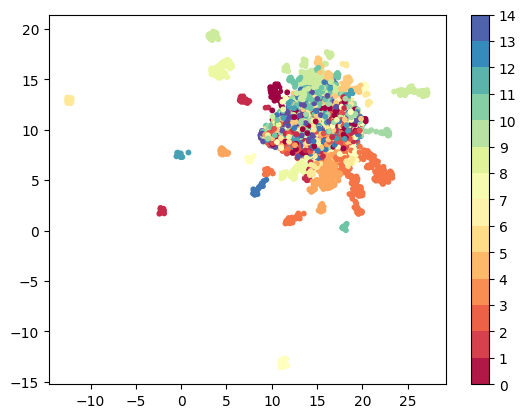

In [14]:
plt.scatter(emb[:,0],emb[:,1],c=label_int,cmap='Spectral', s=10)
plt.colorbar(boundaries=np.arange(15)).set_ticks(np.arange(15))